In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pp_df = pd.read_csv('pp_lula_by_municipio.csv')
pp_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SG_UF         5 non-null      object 
 1   NM_MUNICIPIO  5 non-null      object 
 2   CD_MUNICIPIO  5 non-null      int64  
 3   QT_VOTOS      5 non-null      int64  
 4   PP_LULA       5 non-null      float64
 5   pib           5 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 372.0+ bytes


<AxesSubplot: xlabel='pib per voto', ylabel='PP_LULA'>

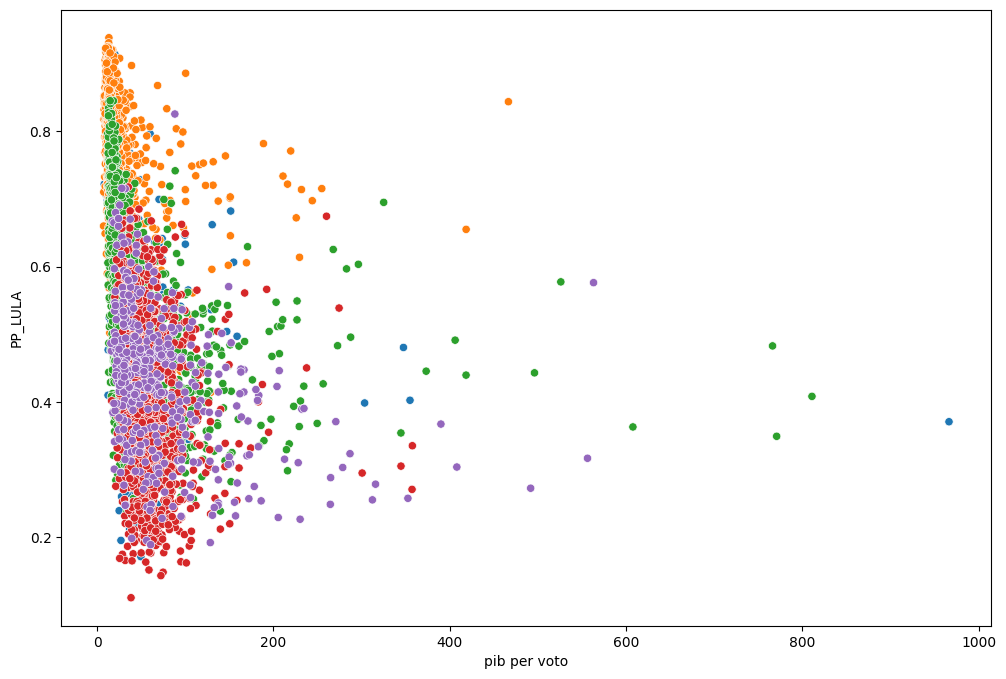

In [27]:
plt.figure(figsize=(12,8))
regioes = pd.read_csv('regioes.csv')
joined_df = pd.merge(pp_df, regioes, on='SG_UF', how='left')
from helpers import string_code_to_int
joined_df['pib'] = joined_df['pib'].apply(lambda x: string_code_to_int(x))
joined_df['pib per voto'] = joined_df['pib']/joined_df['QT_VOTOS']
sns.scatterplot(x='pib per voto',y='PP_LULA',data=joined_df, hue='REGIAO',legend=False)

In [35]:
df = px.data.iris()
fig = px.scatter(joined_df, x='pib per voto',y='PP_LULA', hover_data=['SG_UF','NM_MUNICIPIO'],color_discrete_sequence=['red'],range_x=[0, 100],range_y=[0, 1],marginal_x="histogram",marginal_y="histogram")
fig.show()

In [33]:
df = px.data.iris()
fig = px.scatter(joined_df, x='pib per voto',y='PP_LULA', color="REGIAO", hover_data=['SG_UF','NM_MUNICIPIO'],color_discrete_sequence=['green','red','blue','#00f2ff','#e8ae00'],range_x=[0, 100],range_y=[0, 1],marginal_x="histogram",marginal_y="histogram")
fig.show()

ValueError: Could not interpret value `idh` for `x`. An entry with this name does not appear in `data`.

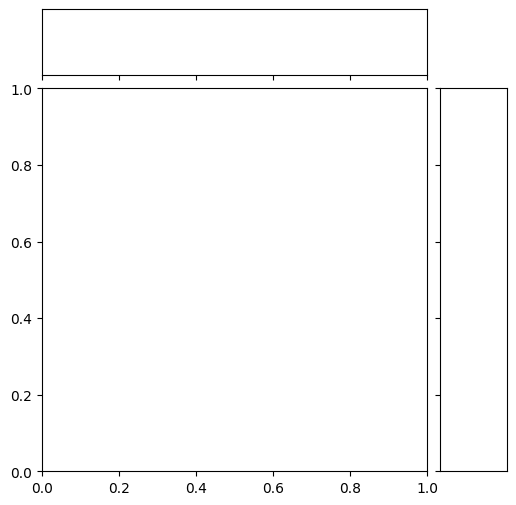

In [13]:
sns.jointplot(x='idh',y='PP_LULA',data=joined_df, hue='REGIAO',legend=False)

<Figure size 1200x800 with 0 Axes>

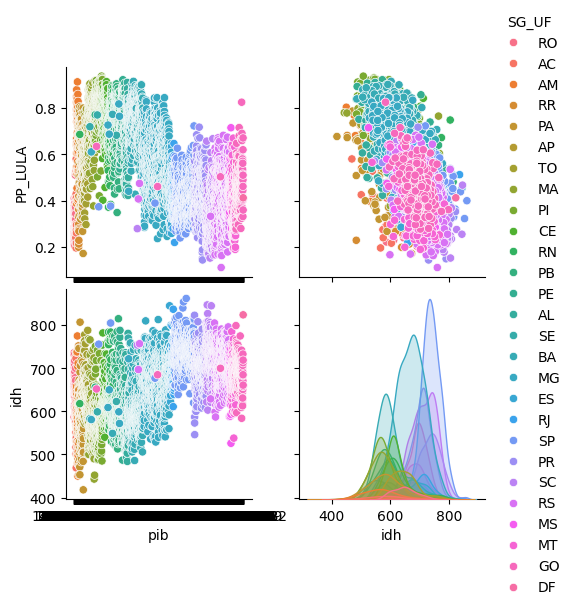

In [32]:
plt.figure(figsize=(12,8))
sns.pairplot(pp_df[['SG_UF','PP_LULA','pib','idh']],x_vars=['pib','idh'], hue='SG_UF')